# Ejercicios Entrega 2

## Ejercicio 1
### Muestra en vivo el efecto de diferentes filtros, seleccionando con el teclado el filtro deseado y modificando sus parámetros (p.ej. el nivel de suavizado) con trackbars. Aplica el filtro en un ROI para comparar el resultado con el resto de la imagen ([ejemplo](../images/demos/ej-c4.png)). Diseña el ejercicio de forma que sea fácilmente ampliable.

Este ejercicio está implementado en el archivo `./Ej1yEj4.py` en el cual se definen varias funciones. 

La primera es para pintar el menu de ayuda como la imagen de ejemplo.

Tras ella, tengo 3 funciones para cambiar el valor de 3 variables distintas.

Después, 2 funciones para aplicar el box filter hecho por mi, pero no me detendré en explicarlas ahora puesto que esto se verá en el ejercicio 4.

Además tengo una funcion para aplicar un filtro el cual se le indica por parámetros, ademas del propio frame a usar, y los valores de sigma, sigma color y rad, siendo los dos últimos necesarios solamente para el filtro bilateral.

Y como última funcion auxiliar tengo una manejador de claves, el cual indica según se presione un numero u otro, el filtro a aplicar.

Además, en el main manejo si se quiere salir del programa (q), si quiero alternar entre solo roi o todo el frame (r), si quiero color o solo blanco y negro (c) o si quiero mostrar/ocultar el menu de ayuda (h). 

Tras esas comprobaciones, se aplica el filtro en funcion de ellas y se muestra.

En el siguiente video se puede comprobar como se aplican los distintos filtros de la imagen:

<video width="640" height="360" controls>
  <source src="./Imagenes/Ej1.mp4" type="video/mp4">
  Tu navegador no soporta la reproducción de videos.
</video>



## Ejercicio 2
### Comprueba la propiedad de "cascading" del filtro gaussiano.

Para comenzar explicaré que es la propiedad de "cascading" del filtro gaussiano. Esta propiedad consiste en que aplicar un filtro gaussiano con una varianza (desviación típica) y aplicar otro con otra varianza al resultado de aplicar el primer filtro es equivalente a aplicar un filtro con la desviación típica combinada de ambas (es decir, la raíz cuadrada de la suma de ambas desviaciones típicas al cuadrado)

$$ \sigma_{total} = \sqrt{\sigma_{1}^2 + \sigma_{2}^2} $$

Para ello, he creado un programa el cual aplica 2 filtros gausianos como he explicado, y aplica otro distinto con la desviación combinada.
El resultado es una imagen combinada con un `np.hstack` donde en primer lugar está el frame original, en el medio está la imagen resultante de aplicar los 2 filtros, y al final la imagen que aplica uno con la desviación típica combinada, tal y como se ve en la siguiente imagen.

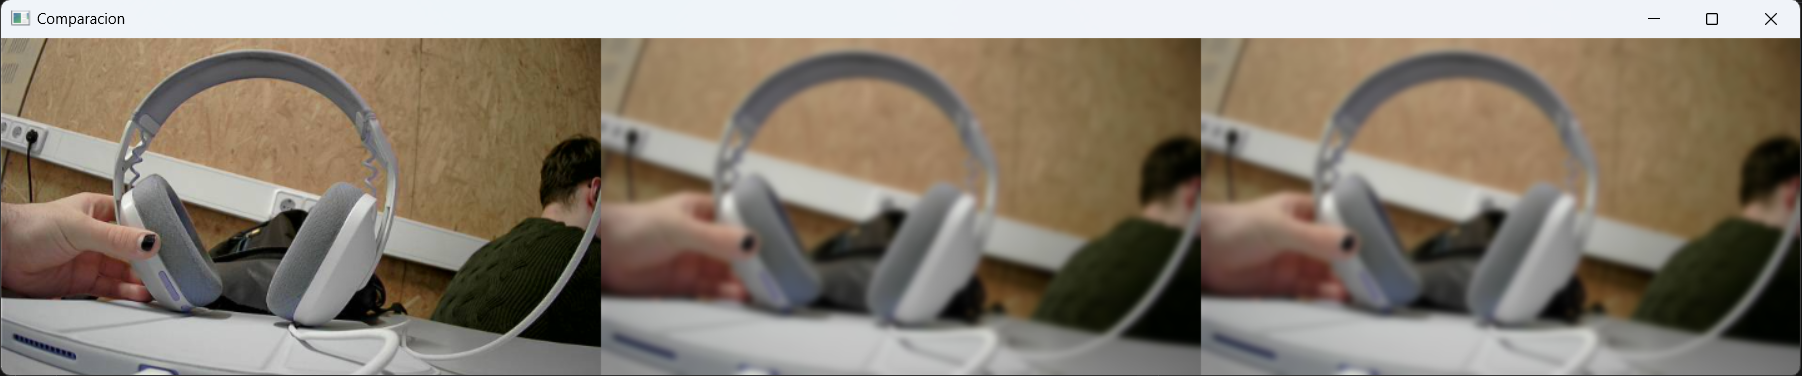


## Ejercicio 3
### Comprueba la propiedad de "separabilidad" del filtro gaussiano.

Del mismo modo que en el ejercicio anterior, comenzaré explicando que es la propiedad de separabilidad del filtro gaussiano. Esta propiedad significa que un filtro gaussiano en 2 dimensiones se puede descomponer en 2 filtros unidimensionales, uno en el eje vertical y el otro en el horizontal. Lo cual quiere decir, que aplicar un filtro gaussiano en uno de los dos ejes, y al resultado de ello, aplicarle otro filtro gaussiano en el eje restante, es equivalente a aplicar el filtro en ambos ejes a la vez. Sin embargo, la ventaja de esta propiedad es que en lugar de aplicar un filtro de orden $O(N^2)$ aplicamos dos de orden $O(N)$, lo que computacionalmente sigue siendo de orden $O(N)$. Ademas, supone una reducción del consumo de memoria, ya que se almacenan 2 arrays de una sola dimensión en vez de uno de dos dimensiones.

Ahora sí, mostraré con un ejemplo que esta propiedad se cumple. Para lo cual he hecho un programa en python para poder comprobarlo que se encuentra en la carpeta `./Entregas/Entrega2/` con el nombre `./Ej3.py` y el resultado es el siguiente:

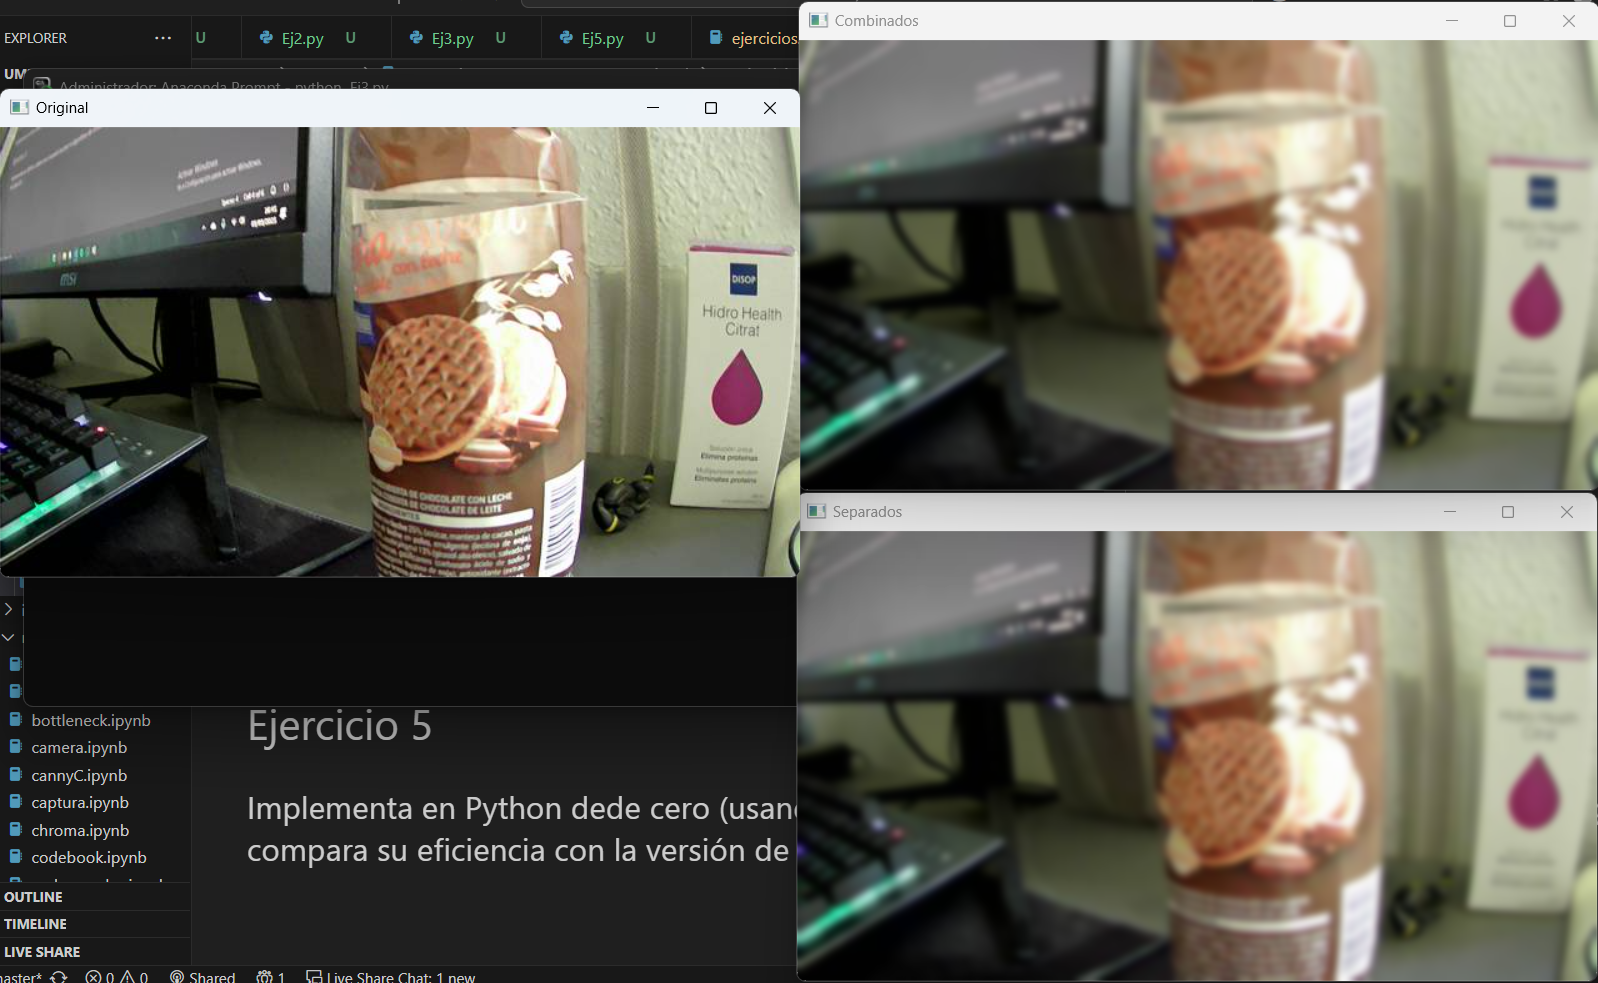

Donde efectivamente, se comprueba que ambos son exactamente iguales entre ellos.

## Ejercicio 4
### Implementa el box filter con la imagen integral.

Este ejercicio se encuentra implementado en el fichero `./Ej1yEj4.py` en la carpeta `./Entregas/Entrega2/`. En el se encuentran las 2 funciones mencionadas en el ejercicio 1, las cuales son `box_filter_integral(img, ksize)` y `apply_box_filter(img, ksize)`.

En cuanto a la función `box_filter_integral(img, ksize)`, simplemente la utilizo para comprobar si la imagen que me llega como parámetro (`img`), está en 2 o 3 canales (BGR o grises). En el caso de ser RGB, divido la imagen en los 3 canales, le aplico el filtro con la función `apply_box_filter(img, ksize)` y luego los junto con un `cv2.merge` para devolver la imagen con el filtro e 3 canales. En caso contrario, simplemente aplico el filtro directamente.

Por otra parte, la función `apply_box_filter(img, ksize)` es la que realmente implementa el filtro. Para ello, calculo la imagen integral con la funcion `cv2.integral` sobre la imagen que tengo como parámetro. También obtengo el alto y ancho de la imagen original y creo una matriz de ceros llamada `output` con esas dimensiones. Además, defino un offset el cual es el tamaño del tamaño del kernel (también obtenido como parámetro) dividido por 2, pero aplicando la división entera de python (`ksize // 2`)

Tras todas estas definiciones iniciales, hago 2 bucles para recorrer la imagen integral. Primero defino los valores de `x1, y1, x2, y2` y calculo el valor de `S` que es la suma de los valores de los vecinos de la posicion `integral_img[y, x]`. Tambien calculo el número de píxeles calculados y finalmente escribo en la matriz de ceros `output` en la posicion `(y,x)` el resultado de dividir S entre ese número de píxeles.

Tras el bucle, devuelvo la matriz output que es la que tiene el filtro aplicado.

Un ejemplo de ejecución de este filtro es el siguiente:

<video width="640" height="360" controls>
  <source src="./Imagenes/Ej4.mp4" type="video/mp4">
  Tu navegador no soporta la reproducción de videos.
</video>

Como se puede comprobar, la imagen se ve un poco lenta puesto que al ser 3 canales de color, tarda más en calcular el filtro, sin embargo, cuando está en grises, esta se ve mas fluida.

## Ejercicio 5
### Implementa en Python dede cero (usando bucles) el algoritmo de convolución con una máscara general y compara su eficiencia con la versión de OpenCV.

En primer lugar, introduciré que es el algoritmo de convolución. Este algoritmo es una operación matemática utilizada para aplicar filtros a una imagen, permitiendo efectos como suavizado, detección de bordes, realce de detalles, etc.

En mi caso, he obtenido una imagen a partir de la original, y un padding que es la mitad entera del ancho y la mitad entera del alto del kernel original, es decir, `pad_h, pad_w = kernel_h // 2, kernel_w // 2`. Además, he creado una imagen de salida como la imagen original, pero rellena de ceros, para luego rellenarla. 

Para este relleno, recorro la imagen con el padding obteniendo una región de tamaño `kernel_h x kernel_w` en la posición `i,j` de dicha imagen, y tras ello, multiplico esta región, posición a posición, con el kernel original, y luego sumo todas las posiciones y el valor resultante se lo inserto a la posición `i,j` de la matriz de salida, es decir, `output[i,j]`

El resultado de este bucle es la imagen con el filtro de convolución aplicado.

A continuación mostraré los resultados de la ejecución del código encontrado en la ruta `./Entregas/Entrega2/Ej5.py`:

Comparación de la imagen original con la convolución hecha por mí:

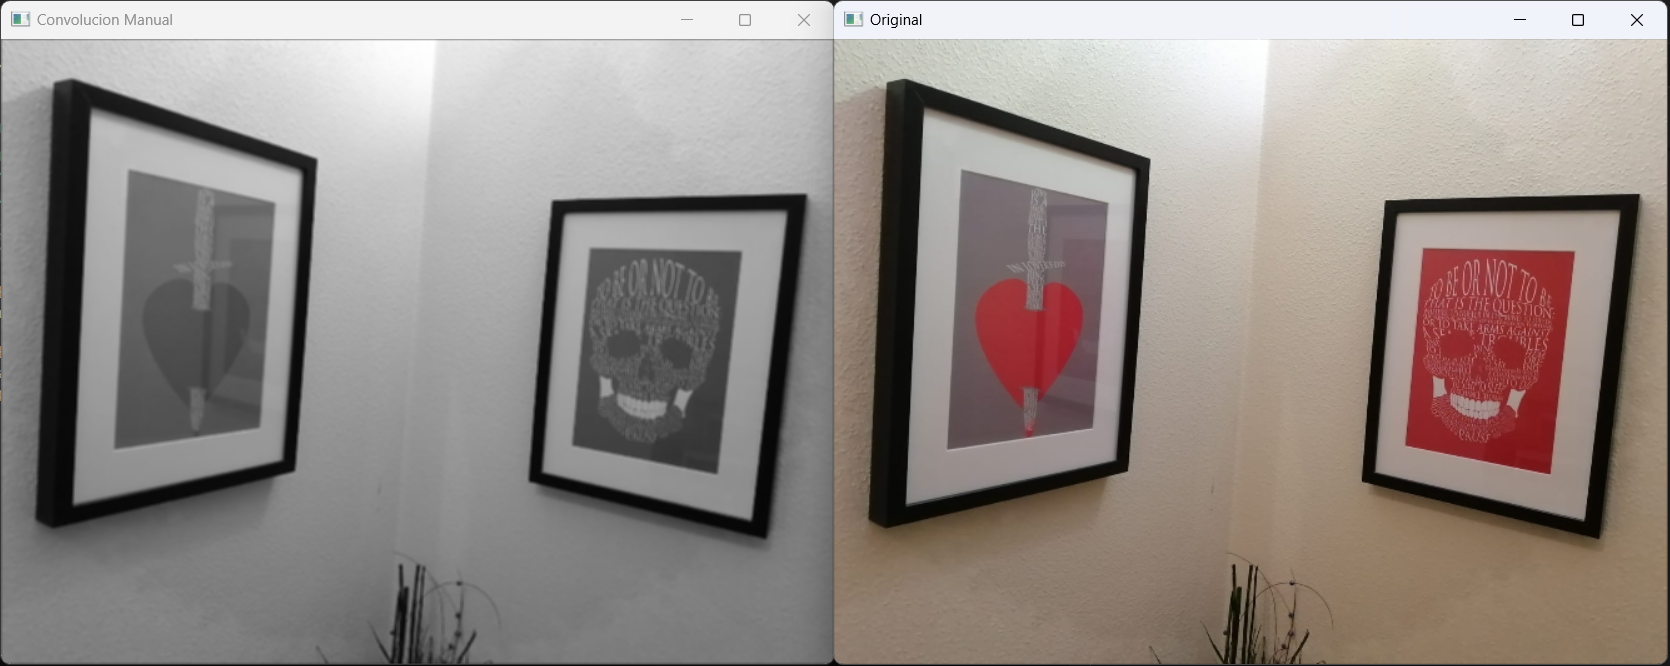

Comparación de la convolución hecha por mí con la convolución de `OpenCV`:

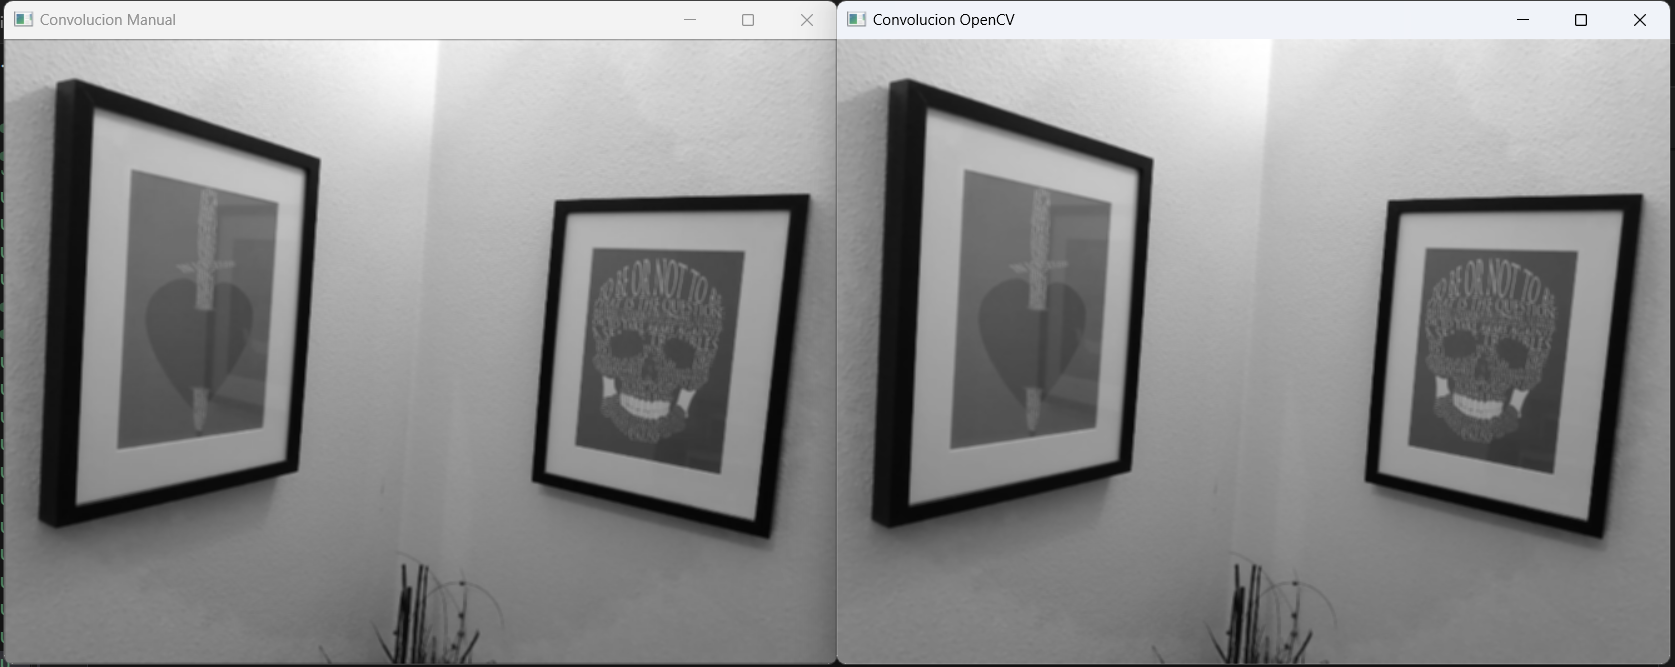

Tiempo de ejecución de ambas convoluciones:

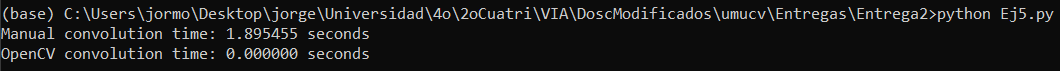

Como se puede comprobar, el coste de la ejecución del algoritmo a mano es considerablemente mayor al coste de la ejecución con OpenCV